In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 차트에서 한글 출력을 위한 설정
from matplotlib import font_manager, rc

import platform
your_os = platform.system()
ttf = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=ttf).get_name()
rc('font', family=font_name)

In [2]:
df_2010 = pd.read_excel('기말 데이터/홍대상권_음식점_한식양식제과_2010.xlsx').drop_duplicates()
df_2023 = pd.read_excel('기말 데이터/홍대상권_음식점_한식양식제과_2023.xlsx').drop_duplicates()

df_2023['상권업종_2'] = df_2023['상권업종_2'].apply(lambda x : 
                                            '제과제빵떡케익' if x == '기타 간이' else ('양식' if x =='서양식' else x))
df_2010['법정동명'] = df_2010.ADDRESS.apply(lambda x : x.split(' ')[2])

In [11]:
df_2010.query("UPJONG2_NM=='한식'").to_csv('기말 데이터/ df_2010_kr.csv', index=False, encoding='cp949')
df_2010.query("UPJONG2_NM=='양식'").to_csv('기말 데이터/ df_2010_ws.csv', index=False, encoding='cp949')
df_2010.query("UPJONG2_NM=='제과제빵떡케익'").to_csv('기말 데이터/ df_2010_bk.csv', index=False, encoding='cp949')

df_2023.query("상권업종_2=='한식'").to_csv('기말 데이터/ df_2023_kr.csv', index=False, encoding='cp949')
df_2023.query("상권업종_2=='양식'").to_csv('기말 데이터/ df_2023_ws.csv', index=False, encoding='cp949')
df_2023.query("상권업종_2=='제과제빵떡케익'").to_csv('기말 데이터/ df_2023_bk.csv', index=False, encoding='cp949')

# 업종별 생존 매장 분석

In [15]:
한식_2010 = df_2010.loc[df_2010.UPJONG2_NM == '한식']
양식_2010 = df_2010.loc[df_2010.UPJONG2_NM == '양식']
제과_2010 = df_2010.loc[df_2010.UPJONG2_NM == '제과제빵떡케익']

한식_2023 = df_2023.loc[df_2023.상권업종_2 == '한식']
양식_2023 = df_2023.loc[df_2023.상권업종_2 == '양식']
제과_2023 = df_2023.loc[df_2023.상권업종_2 == '제과제빵떡케익']

In [16]:
a, b, c, = len(한식_2010), len(양식_2010), len(제과_2010)
d, e, f, = len(한식_2023), len(양식_2023), len(제과_2023)
print('2010년 :', a, b, c, a+b+c)
print('2023년 :', d, e, f, d+e+f)

2010년 : 439 226 37 702
2023년 : 462 144 59 665


In [17]:
한식_2010['상호_도로명'] = 한식_2010.STORE_NM + '|' + 한식_2010.표준신주소
양식_2010['상호_도로명'] = 양식_2010.STORE_NM + '|' + 양식_2010.표준신주소
제과_2010['상호_도로명'] = 제과_2010.STORE_NM + '|' + 제과_2010.표준신주소

한식_2023['상호_도로명'] = 한식_2023.상호명 + '|' + 한식_2023.도로명주소
양식_2023['상호_도로명'] = 양식_2023.상호명 + '|' + 양식_2023.도로명주소
제과_2023['상호_도로명'] = 제과_2023.상호명 + '|' + 제과_2023.도로명주소

한식_2010.dropna(subset=['상호_도로명'], inplace=True)
양식_2010.dropna(subset=['상호_도로명'], inplace=True)
제과_2010.dropna(subset=['상호_도로명'], inplace=True)

한식_2023.dropna(subset=['상호_도로명'], inplace=True)
양식_2023.dropna(subset=['상호_도로명'], inplace=True)
제과_2023.dropna(subset=['상호_도로명'], inplace=True)

C:\Users\Lee_HJ\AppData\Local\Temp\ipykernel_16600\918950895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  한식_2010['상호_도로명'] = 한식_2010.STORE_NM + '|' + 한식_2010.표준신주소
C:\Users\Lee_HJ\AppData\Local\Temp\ipykernel_16600\918950895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  양식_2010['상호_도로명'] = 양식_2010.STORE_NM + '|' + 양식_2010.표준신주소
C:\Users\Lee_HJ\AppData\Local\Temp\ipykernel_16600\918950895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [18]:
a2, b2, c2, = len(한식_2010), len(양식_2010), len(제과_2010)
d2, e2, f2, = len(한식_2023), len(양식_2023), len(제과_2023)
print('2010년 :', a2, b2, c2, a2+b2+c2)
print('2023년 :', d2, e2, f2, d2+e2+f2)

2010년 : 427 223 36 686
2023년 : 462 144 59 665


In [19]:
한식_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 701
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UPJONG1_NM  427 non-null    object 
 1   UPJONG2_NM  427 non-null    object 
 2   UPJONG3_NM  427 non-null    object 
 3   STORE_NM    427 non-null    object 
 4   ADDRESS     427 non-null    object 
 5   PHONE       254 non-null    object 
 6   입력주소        427 non-null    object 
 7   X           427 non-null    float64
 8   Y           427 non-null    float64
 9   CLSS        427 non-null    object 
 10  PNU         427 non-null    float64
 11  주소구분        427 non-null    object 
 12  표준신주소       427 non-null    object 
 13  표준구주소       427 non-null    object 
 14  우편번호        426 non-null    float64
 15  법정동명        427 non-null    object 
 16  상호_도로명      427 non-null    object 
dtypes: float64(4), object(13)
memory usage: 60.0+ KB


In [20]:
한식_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 664
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상가업소번   462 non-null    object 
 1   상호명     462 non-null    object 
 2   지점명     6 non-null      object 
 3   상권업종대   462 non-null    object 
 4   상권업종_1  462 non-null    object 
 5   상권업종중   462 non-null    object 
 6   상권업종_2  462 non-null    object 
 7   상권업종소   462 non-null    object 
 8   상권업종_3  462 non-null    object 
 9   표준산업분   462 non-null    object 
 10  표준산업_1  462 non-null    object 
 11  시도코드    462 non-null    int64  
 12  시도명     462 non-null    object 
 13  시군구코드   462 non-null    int64  
 14  시군구명    462 non-null    object 
 15  행정동코드   462 non-null    int64  
 16  행정동명    462 non-null    object 
 17  법정동코드   462 non-null    int64  
 18  법정동명    462 non-null    object 
 19  지번코드    462 non-null    float64
 20  대지구분코   462 non-null    int64  
 21  대지구분명   462 non-null    object 
 22  지번

In [22]:
# 생존 매장 리스트 생성
survival_korean_lst = list(set(한식_2010.상호_도로명) & set(한식_2023.상호_도로명))
survival_western_lst = list(set(양식_2010.상호_도로명) & set(양식_2023.상호_도로명))
survival_bakery_lst = list(set(제과_2010.상호_도로명) & set(제과_2023.상호_도로명))

survival_korean_lst.remove('명품정육식당|서울특별시 마포구 와우산로35길 67')
survival_western_lst.remove('프리모바치오|서울특별시 마포구 와우산로23길 44')

print(survival_korean_lst, len(survival_korean_lst))
print(survival_western_lst, len(survival_western_lst))
print(survival_bakery_lst, len(survival_bakery_lst))

['형님저여요|서울특별시 마포구 어울마당로 136', '옹달샘|서울특별시 마포구 양화로6길 99', '싸리골|서울특별시 마포구 홍익로5길 51', '솔내한옥집|서울특별시 마포구 독막로3길 21-4', '함지박|서울특별시 마포구 와우산로32길 41', '곱창전골|서울특별시 마포구 와우산로29길 8', '웨스턴후라이드라이스|서울특별시 마포구 홍익로 26', '고집|서울특별시 마포구 홍익로 3-11', '사랑채|서울특별시 마포구 신촌로12가길 36', '마포소문난족발|서울특별시 마포구 양화로6길 9', '원당감자탕|서울특별시 마포구 와우산로21길 20-6', '춘향골남원추어탕|서울특별시 마포구 서강로 137-7', '밥순이|서울특별시 마포구 서강로9길 55', '마포소금구이|서울특별시 마포구 와우산로32길 36', '돼지저금통|서울특별시 마포구 어울마당로 146-1', '도마|서울특별시 마포구 양화로16길 33', '김장독|서울특별시 마포구 양화로18길 9', '최고네|서울특별시 마포구 신촌로4길 3', '바다나라|서울특별시 마포구 어울마당로 143', '철길왕갈비살|서울특별시 마포구 와우산로32길 24', '행복한식탁|서울특별시 마포구 양화로 156', '털보고된이|서울특별시 마포구 양화로 178-8', '돈포미삼겹살|서울특별시 마포구 신촌로 76-5', '교수곱창|서울특별시 마포구 홍익로3길 20', '통통돼지|서울특별시 마포구 어울마당로 126-1', '장가네한우촌|서울특별시 마포구 양화로16길 10', '옛날무쇠솥|서울특별시 마포구 서강로1길 12-5', '돈수백|서울특별시 마포구 홍익로6길 56', '옛날집|서울특별시 마포구 어울마당로 143', '도적|서울특별시 마포구 어울마당로5길 3', '백년백세|서울특별시 마포구 양화로 118', '육쌈냉면|서울특별시 마포구 와우산로23길 35', '서교동고기집|서울특별시 마포구 와우산로35길 67', '육쌈냉면|서울특별시 마포구 어울마당로 76'] 34
['캐롤킹|서울특별시 마포구 홍익로6길 18', '마루돈까스|

In [23]:
# 업종별 생종 매장 데이터 프레임 생성
survival_kr = 한식_2023.loc[한식_2023['상호_도로명'].isin(survival_korean_lst)]
survival_ws = 양식_2023.loc[양식_2023['상호_도로명'].isin(survival_western_lst)]
survival_bk = 제과_2023.loc[제과_2023['상호_도로명'].isin(survival_bakery_lst)]

survival = pd.concat([survival_kr, survival_ws, survival_bk])

In [35]:
survival_dong_cnt = survival.groupby('법정동명')['상호명'].agg([('생존 매장 수',
                                                          'count')]).reset_index().sort_values('생존 매장 수',ascending=False)
survival_dong_cnt['2010년 법정동별 매장 수'] = [458,96,68,39]
survival_dong_cnt['법정동별 생존율'] = survival_dong_cnt['생존 매장 수']/survival_dong_cnt['2010년 법정동별 매장 수']*100
survival_dong_cnt['생존 매장 비율'] = survival_dong_cnt['생존 매장 수'].apply(lambda x : x/sum(survival_dong_cnt['생존 매장 수'])*100)
survival_dong_cnt

,법정동명,생존 매장 수,2010년 법정동별 매장 수,법정동별 생존율,생존 매장 비율
2,서교동,24,458,5.240175,58.536585
1,동교동,11,96,11.458333,26.829268
0,노고산동,3,68,4.411765,7.317073
3,창전동,3,39,7.692308,7.317073


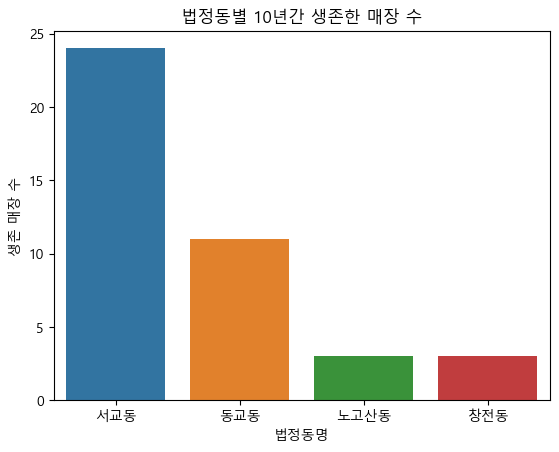

In [25]:
sns.barplot(x='법정동명', y='생존 매장 수', data=survival_dong_cnt)
plt.title('법정동별 10년간 생존한 매장 수')
plt.show()

In [24]:
# 데이터프레임 저장
# survival_kr.to_csv('survial_kr.csv',index=False,encoding='cp949')
# survival_ws.to_csv('survial_ws.csv',index=False,encoding='cp949')
# survival_bk.to_csv('survial_bk.csv',index=False,encoding='cp949')

# 업종별 매장 증감율

In [26]:
type_2010 = df_2010[['STORE_NM','UPJONG2_NM','UPJONG3_NM','법정동명']]
type_2023 = df_2023[['상호명','상권업종_2','상권업종_3','법정동명']]
display(type_2010, type_2023)

,STORE_NM,UPJONG2_NM,UPJONG3_NM,법정동명
0,시로,한식,한식/백반/한정식,서교동
1,피아체레(piacere),양식,정통양식/경양식,서교동
2,섬소년,한식,한식/백반/한정식,서교동
3,토마토도시락 홍대점,한식,한식/백반/한정식,창전동
4,솥,한식,한식/백반/한정식,서교동
...,...,...,...,...
697,단추,양식,기타전문서양음식점,서교동
698,파스타부오노,양식,기타전문서양음식점,동교동
699,비나모르(와인바),양식,기타전문서양음식점,서교동
700,레뜨레깜빠네,양식,기타전문서양음식점,서교동


,상호명,상권업종_2,상권업종_3,법정동명
0,뚜레쥬르신촌,제과제빵떡케익,빵/도넛,노고산동
1,무국적식탁,한식,백반/한정식,동교동
2,모두의주방,한식,백반/한정식,서교동
3,피오니케이크,제과제빵떡케익,빵/도넛,서교동
4,무쏘홍대입구역점,한식,백반/한정식,동교동
...,...,...,...,...
660,티퍼프,양식,경양식,서교동
661,든든덮밥&곱도리,한식,기타 한식 음식점,서교동
662,티제이프렌즈수상한베이글,제과제빵떡케익,빵/도넛,서교동
663,라라음악사,한식,백반/한정식,상수동


In [27]:
df_2010_cnt = type_2010.groupby('UPJONG2_NM')['STORE_NM'].agg([('2010_cnt',
                                                                'count')]).reset_index().sort_values('2010_cnt',ascending=False)
df_2023_cnt = type_2023.groupby('상권업종_2')['상호명'].agg([('2023_cnt',
                                                       'count')]).reset_index().sort_values('2023_cnt',ascending=False)

In [30]:
df_year_cnt = pd.concat([df_2010_cnt, df_2023_cnt[['2023_cnt']]],axis=1).rename(columns={'UPJONG2_NM':'업종'})
df_year_cnt['증감율'] = (df_year_cnt['2023_cnt']-df_year_cnt['2010_cnt'])/df_year_cnt['2010_cnt']*100
df_year_cnt['10년 이상 생존 매장 수'] = [34,3,4]
df_year_cnt['10년 이상 생존율'] = df_year_cnt['10년 이상 생존 매장 수']/df_year_cnt['2010_cnt']*100
df_year_cnt

,업종,2010_cnt,2023_cnt,증감율,10년 이상 생존 매장 수,10년 이상 생존율
2,한식,439,462,5.239180,34,7.744875
0,양식,226,144,-36.283186,3,1.327434
1,제과제빵떡케익,37,59,59.459459,4,10.810811


In [14]:
4/37*100

10.81081081081081

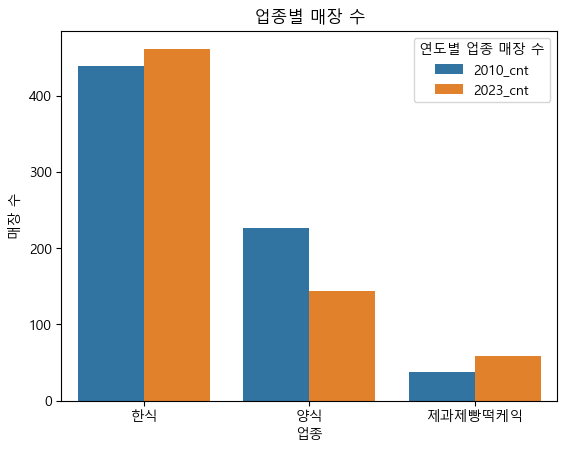

In [83]:
df_melt = pd.melt(df_year_cnt, id_vars="업종", var_name="연도별 업종 매장 수", value_name="매장 수")
sns.barplot(x='업종', y='매장 수', hue='연도별 업종 매장 수', data=df_melt)
plt.title('업종별 매장 수')
plt.show()

In [133]:
dong_2010_cnt = type_2010.groupby('법정동명')['UPJONG2_NM'].agg([('2010년 매장 수','count')]).reset_index()
dong_2023_cnt = type_2023.groupby('법정동명')['상권업종_2'].agg([('2023년 매장 수','count')]).reset_index()
dong_cnt = pd.concat([dong_2010_cnt,dong_2023_cnt[['2023년 매장 수']]],axis=1)
dong_cnt['매장 수 증감률'] = (dong_cnt['2023년 매장 수']-dong_cnt['2010년 매장 수'])/dong_cnt['2010년 매장 수']*100
dong_cnt

,법정동명,2010년 매장 수,2023년 매장 수,매장 수 증감률
0,노고산동,68,37,-45.588235
1,동교동,96,86,-10.416667
2,상수동,41,74,80.487805
3,서교동,458,434,-5.240175
4,창전동,39,34,-12.820513


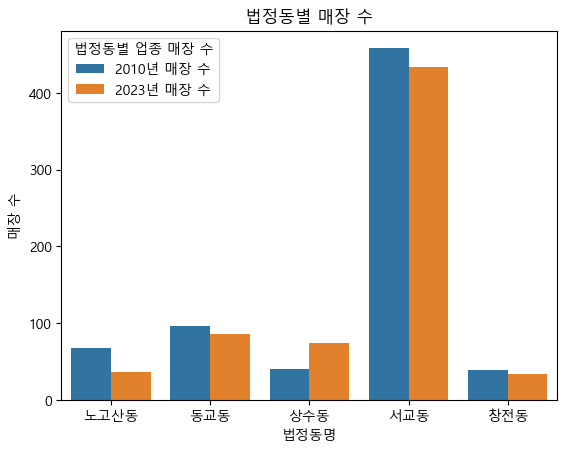

In [135]:
df_melt2 = pd.melt(dong_cnt.iloc[:,:3], id_vars="법정동명", var_name="법정동별 업종 매장 수", value_name="매장 수")
sns.barplot(x='법정동명', y='매장 수', hue='법정동별 업종 매장 수', data=df_melt2)
plt.title('법정동별 매장 수')
plt.show()